## дз 1

## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобятся для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

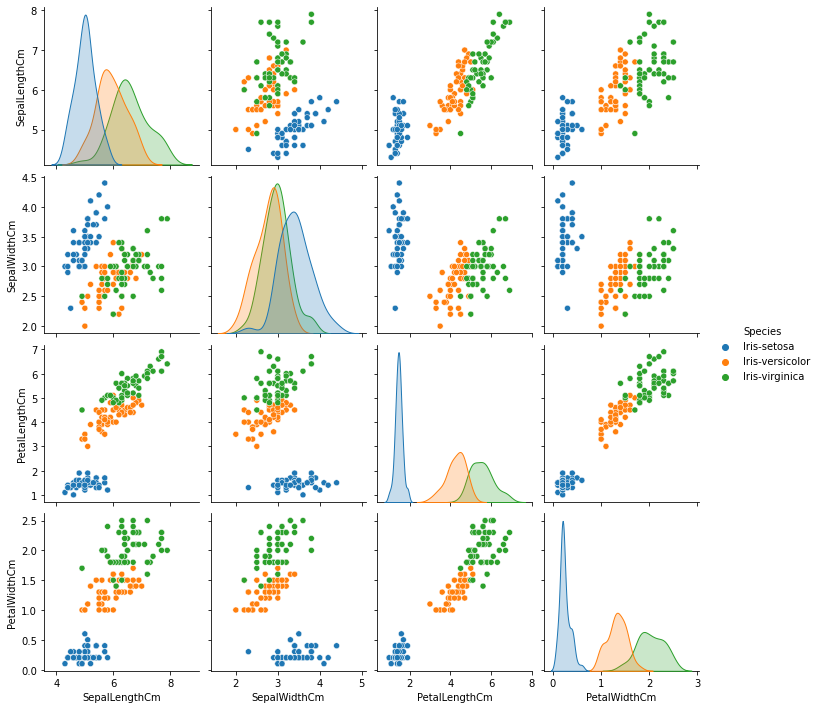

In [3]:

### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(
    ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'],
    [0, 1, 2], 
    inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

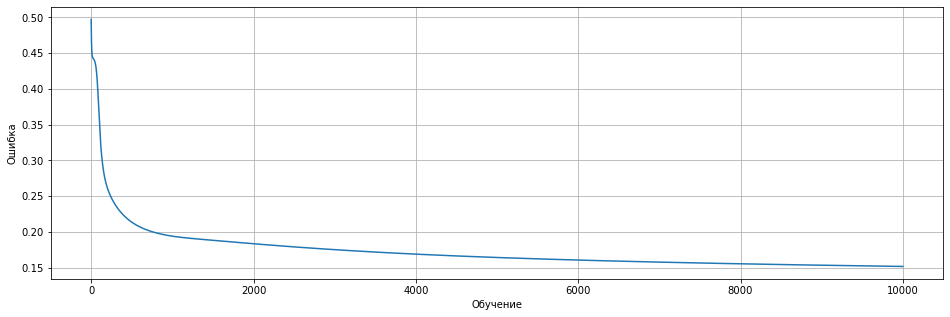

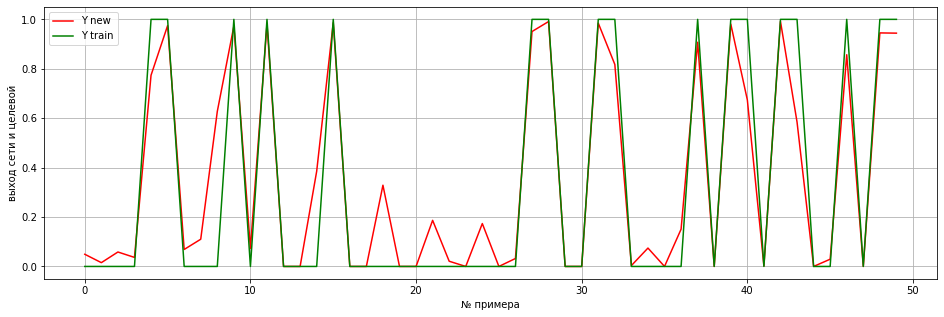

Аккуратность нейронной сети 84.84%


In [4]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 2

# присваевание случайных весов
w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.05

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    # коррекция
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.grid()
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")



In [5]:
w1

array([[-29.09721032,   6.04135629,  -2.11169761],
       [  3.06663572, -35.58156594,  -2.06899651]])

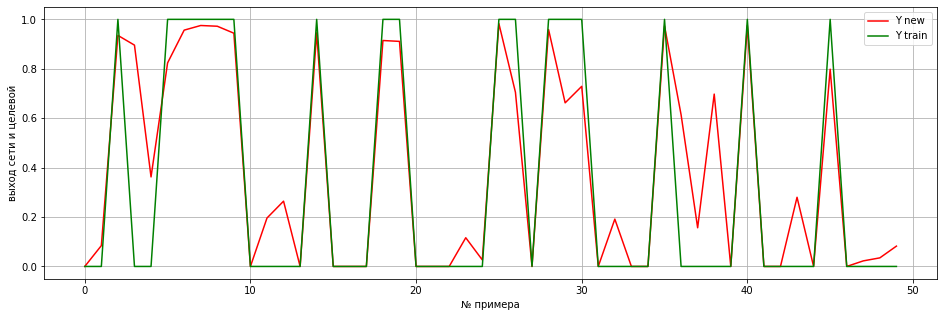

Аккуратность нейронной сети на тесте 84.53%


In [6]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.grid()
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

## Соберем в ООП:

In [7]:
def show_error(errors):
    plt.figure(figsize = (16,5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.grid()
    plt.show()
    
def show_estimation(y, y_pred, N=50):
    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(y_pred[:N,1], 'r',label = 'Y new')
    plt.plot(y[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.grid()
    plt.show()
    
def accuracy(y, y_pred):
    error = np.mean(np.abs(y - y_pred))
    res = (1 - error) * 100
    return res
    
class Neural_network:
    def __init__(self, layers: list, funcs: list=None, derivs: list=None):
        self.errors = []
        self.layers = [None] * len(layers)
        self.funcs = funcs
        if funcs is None:
            self.funcs = [sigmoid] * (len(layers) - 1)
        self.derivs = derivs
        if derivs is None:
            self.derivs = [sigmoid_deriv] * (len(layers) - 1)
        self.w = [2*np.random.random((layers[0], layers[1])) - 1]
        for i in range(2, len(layers)):
            self.w.append(2*np.random.random((self.w[-1].shape[1], layers[i])) - 1)
    
    def predict(self, X):
        self.layers[0] = X
        for i, w_i in enumerate(self.w, start=1):
            self.layers[i] = self.funcs[i-1](np.dot(self.layers[i-1], w_i))
        return self.layers[-1]
    
    def fit(self, X, y, n=0.05, era=10000):
        self.errors = []
        for i in range(era):
            # прямое распространение(feed forward)
            y_pred = self.predict(X)

            # обратное распространение(back propagation) с использованием градиентного спуска
            last_layer_error = y - y_pred
            last_layer_delta = last_layer_error * self.derivs[-1](y_pred)
            
            for i in range(len(self.w)-1, -1, -1):
                self.w[i] += self.layers[i].T.dot(last_layer_delta) * n  # коррекция
                layer_error = last_layer_delta.dot(self.w[i].T)
                last_layer_delta = layer_error * self.derivs[i](self.layers[i])
               
            self.errors.append(np.mean(np.abs(last_layer_error)))


## повторим:

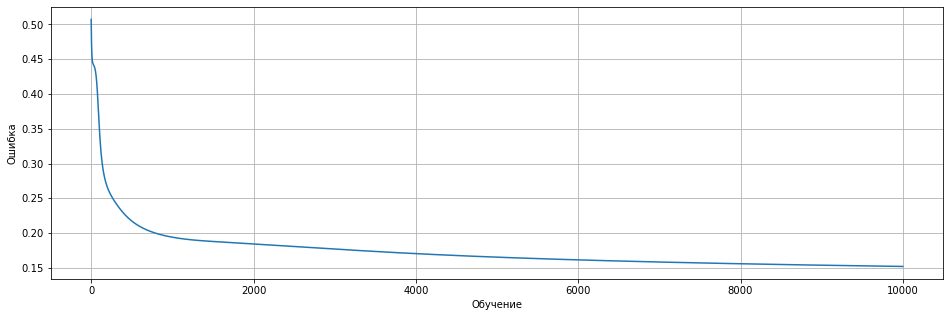

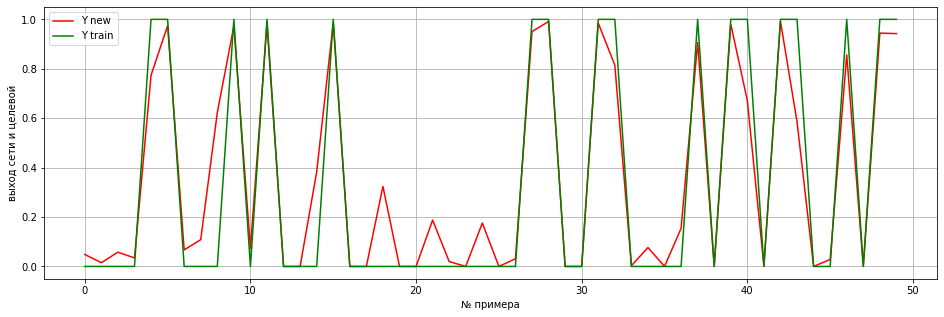

Аккуратность нейронной сети 84.8%


In [8]:
model = Neural_network([4,2,3])
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

show_error(model.errors)
show_estimation(y_train, y_pred)
print("Аккуратность нейронной сети " + str(round(accuracy(y_train, y_pred), 2)) + "%")

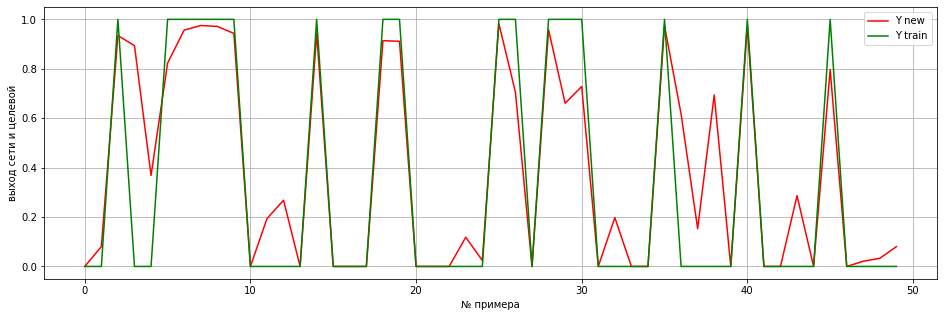

Аккуратность нейронной сети 84.49%


In [9]:
y_pred = model.predict(X_test)

show_estimation(y_test, y_pred)
print("Аккуратность нейронной сети " + str(round(accuracy(y_test, y_pred), 2)) + "%")

## Подберем лучшие параметры

In [10]:
import itertools

In [11]:
%%time

preds = dict()
widths = [2, 5, 10, 15]
hiddens = [1, 2, 3]
learning_rates = [0.1, 0.05, 0.01]
eras = [5000, 10000, 20000]

for h in hiddens:
    for schema in itertools.product(widths, repeat=h):
        current_schema = [4] + list(schema) + [3]
        
        for n, era in itertools.product(learning_rates, eras):
            model = Neural_network(current_schema)
            model.fit(X_train, y_train, n, era)

            y_pred = model.predict(X_train)
            y_pred_test = model.predict(X_test)

            preds[f'{current_schema} n:{n} era:{era}'] = [
                model, 
                accuracy(y_train, y_pred), 
                accuracy(y_test, y_pred_test)
            ]
        print('-', end='')
    print()

----
----------------
----------------------------------------------------------------
Wall time: 25min 17s


In [22]:
pd.DataFrame(preds.values(), 
             index=preds.keys(), 
             columns=['model','train_score','test_score']).sort_values(
                by=['test_score'], ascending=False)[['train_score','test_score']][:30]

,train_score,test_score
"[4, 15, 2, 10, 3] n:0.1 era:20000",97.658317,96.586709
"[4, 10, 5, 5, 3] n:0.1 era:20000",98.527671,96.444938
"[4, 2, 10, 5, 3] n:0.1 era:20000",99.833206,96.423724
"[4, 5, 15, 3] n:0.05 era:20000",98.929789,96.388841
"[4, 5, 5, 5, 3] n:0.05 era:20000",98.358043,96.376853
"[4, 15, 2, 5, 3] n:0.1 era:20000",98.634563,96.375256
"[4, 5, 2, 10, 3] n:0.1 era:20000",99.058783,96.362240
"[4, 2, 15, 10, 3] n:0.1 era:20000",99.047061,96.360022
"[4, 2, 15, 5, 3] n:0.1 era:20000",99.748318,96.350871
"[4, 2, 10, 3] n:0.1 era:20000",99.689763,96.288952


Лучшие модели настолько разнообразны, что кроме большого количества эпох влияет только рандом. Но, хочется отметить, что только одна модель с одним скрытым слоем "[4, 10, 3] n:0.1 era:20000" попала в топ, но переобучилась она больше, чем номер 1, который совсем не плох